# LABORATORIO VIRTUAL DE RUIDO

Sistemas de Visión

Carlos Jara y Christopher Morales

## Ejercicio 1 - "Identificación  y Filtrado de Ruido"

In [53]:
#Importar las librerías por utlizar
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from skimage.filters import gaussian, median, sobel

#Obtener la direccion de las imagenes
path = os.getcwd()



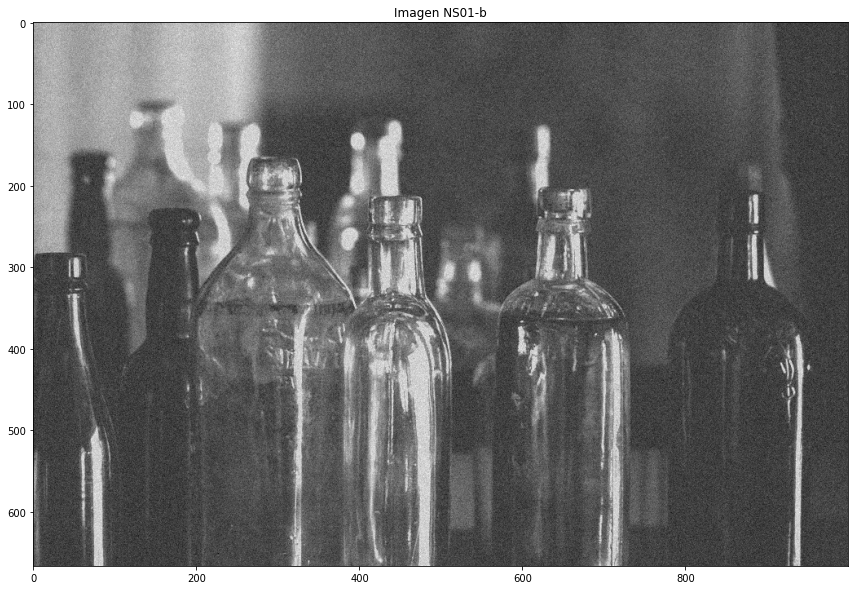

In [43]:
#Mostrar la Imagen original NS01_b
NS01_b= io.imread(path +r'\NS01\NS01-b.png',True)

plt.figure(figsize=(15,10))
plt.imshow(NS01_b,cmap='gray')
plt.title("Imagen NS01-b")
plt.show()

Ruido de tipo gaussiano:
se puede reducir:

1. Filtro gaussiano
2. Filtro bilateral

Este tipo de ruido, cuya naturaleza es gaussiana o normal, se puede neutralizar mediante una máscara que tenga una aproximación discreta de una distribución gaussiana.

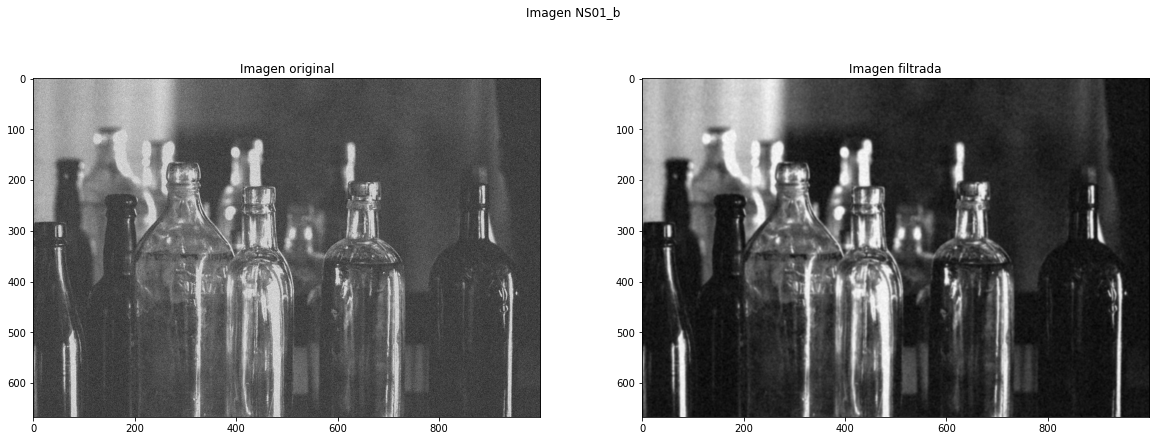

In [48]:
#Filtro Gaussiano
NS01_b_filtrada = gaussian(NS01_b, sigma=1.3)

fig2, axs = plt.subplots(1,2,figsize=(20,7))
fig2.suptitle('Imagen NS01_b')
axs[0].imshow(NS01_b,cmap='gray')
axs[0].set_title('Imagen original')

axs[1].imshow(NS01_b_filtrada,cmap='gray')
axs[1].set_title('Imagen filtrada')

plt.show()

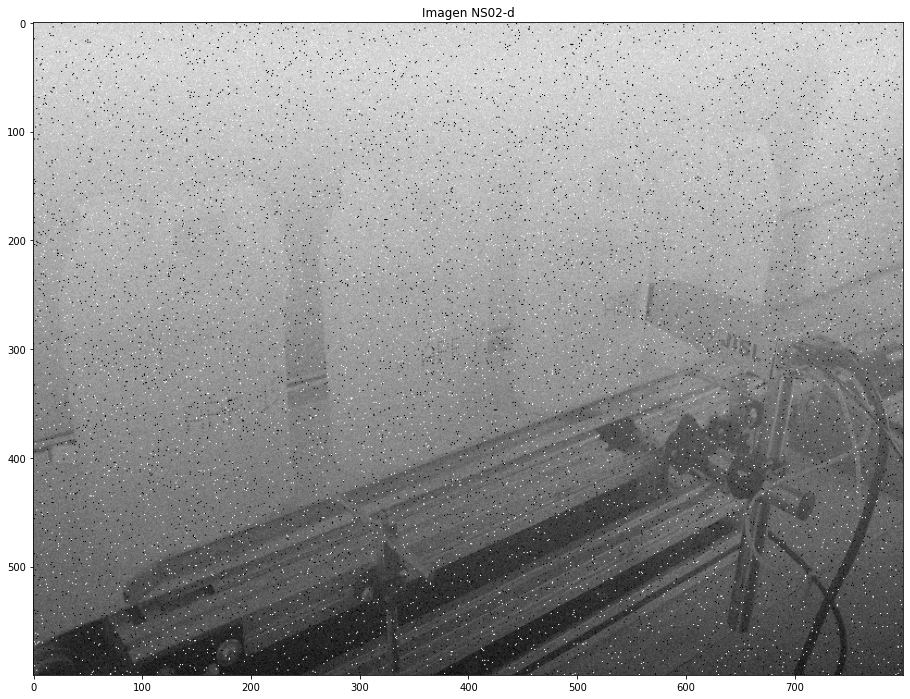

In [45]:
#Mostrar la Imagen original NS02-d
NS02_d= io.imread(path +r'\NS02\NS02-d.png',True)

plt.figure(figsize=(16,12))
plt.imshow(NS02_d,cmap='gray')
plt.title("Imagen NS02-d")
plt.show()

Ruido de tipo sal y pimienta
se puede reducir:

1. Filtro de sustitución aproximado (mediana)
2. Filtro de sustitución máximo-mínimo
3. Filtro de sustitución bicho raro

En este caso se utilizará un filtro de mediana para reducir el ruido sal y pimienta de forma que los valores atípicos o extremos de gradiente se eliminan al desplazar el kernel de convolución

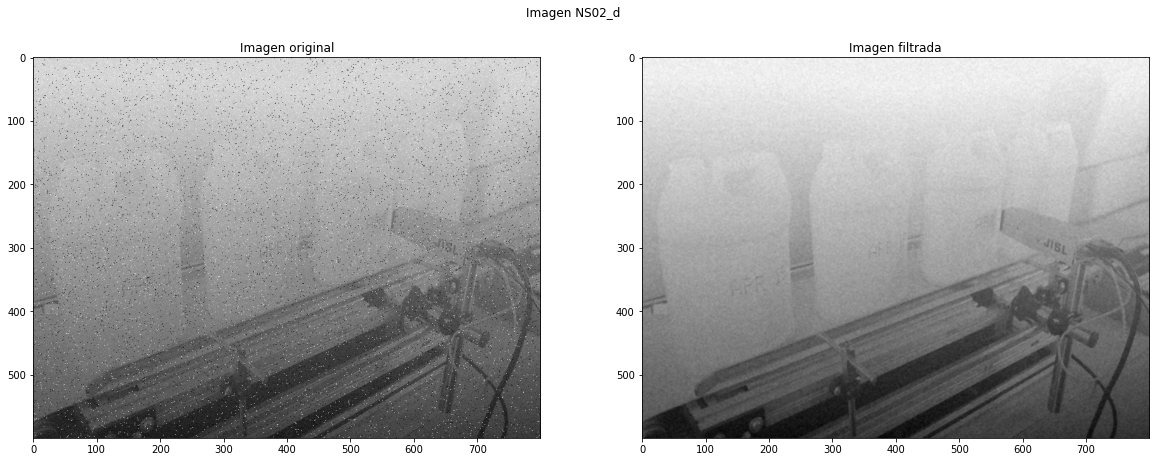

In [46]:
#Filtro de mediana
NS02_d_filtrada = median(NS02_d)

fig3, axs = plt.subplots(1,2,figsize=(20,7))
fig3.suptitle('Imagen NS02_d')
axs[0].imshow(NS02_d,cmap='gray')
axs[0].set_title('Imagen original')

axs[1].imshow(NS02_d_filtrada,cmap='gray')
axs[1].set_title('Imagen filtrada')

plt.show()

## Ejercicio 2 - Programación de una Máscara "desde cero"

Las máscaras de convolución de un filtro de Sobel, se dividen en 2: horizontal y vertical. Estos kernels buscan realizar una aproximación a la derivada de la señal en estas dos direcciones. De forma que, el horizontal detecta cambios grandes de gradiente la desplazarse en el eje horizontal, de forma que se detectan las altas frecuencias horizontales. En otras palabras es un filtro pasas altas de frecuencias horizontales. Para entender mejor este concepto se analiza una porción de una imagen con la máscara horizontal: 

Si la porción de imagen de arriba a abajo es uniforme (baja frecuencia horizontal) al desplazar el kernel, la fila superior [1 2 1] se cancela con la fila inferior [-1 -2 -1], por lo que el valor obtenido es bajo (o nulo); sin embargo, si existe un borde horizontal (alta frecuencia horizontal) la fila inferior [1 -2 -1] tendrá valores mayores que la fila [1 2 1] por lo tanto en ese punto aumenta el gradiente resultante y se detecta el borde horizontal

De forma análoga, ocurre lo mismo con el kernel vertical para bordes verticales

Si se desea realizar una detección de bordes de 45° y 135° se debe realizar un análisis similar pero cambiando o "rotando" el kernel

In [52]:
#máscara de sobel para 45° y 135°
mask_45 = [
    [2,  1,  0],
    [1,  0, -1], 
    [0, -1, -2]]

mask_135 = [
    [ 0,  1,  2],
    [-1,  0,  1], 
    [-2, -1,  0]]


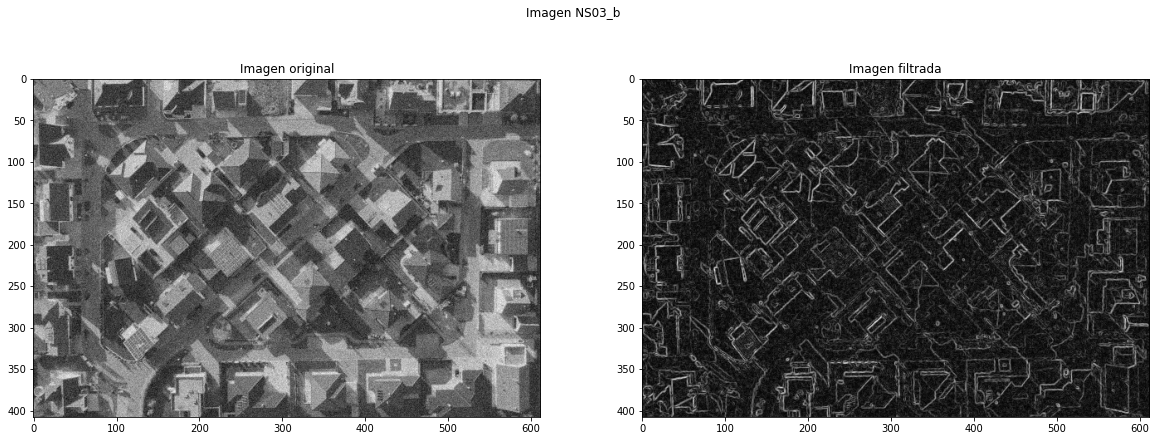

In [55]:
#Mostrar la Imagen original NS03-b
NS03_b= io.imread(path +r'\NS03\NS03-b.png',True)

#Ejecucion de las mascaras
NS03_b_45 = sobel(NS03_b)

fig4, axs = plt.subplots(1,2,figsize=(20,7))
fig4.suptitle('Imagen NS03_b')
axs[0].imshow(NS03_b,cmap='gray')
axs[0].set_title('Imagen original')

axs[1].imshow(NS03_b_45,cmap='gray')
axs[1].set_title('Imagen filtrada')

plt.show()